In [1]:
#Written in JupyterLab Version 3.6.3
#Python 3.10
#pip 23.1.2
import pandas as pd #Version 2.0.1
import matplotlib.pyplot as plt #Version 3.7.1
import seaborn as sns #Version 0.12.2
import altair as alt #Version 5.0.0

In [2]:
# Load full_df file
full_filepath = "./data/cleaned_data/full_df.csv"
full_df = pd.read_csv(full_filepath)
full_df.columns

Index(['FEDFUNDS', 'Owner-Occupied-Home-Proportion', '30-Year-Mortgage-Rate',
       'Consumer-Price-Index', 'Year', 'Month', 'Quarter', 'Region',
       'Home Size', 'Average Sales Price', 'Number of Households (Thousands)',
       'Median Income - Current Dollars', 'Median Income - 2022 Dollars',
       'Mean Income - Current Dollars', 'Mean Income - 2022 Dollars',
       'Year-Quarter-Month'],
      dtype='object')

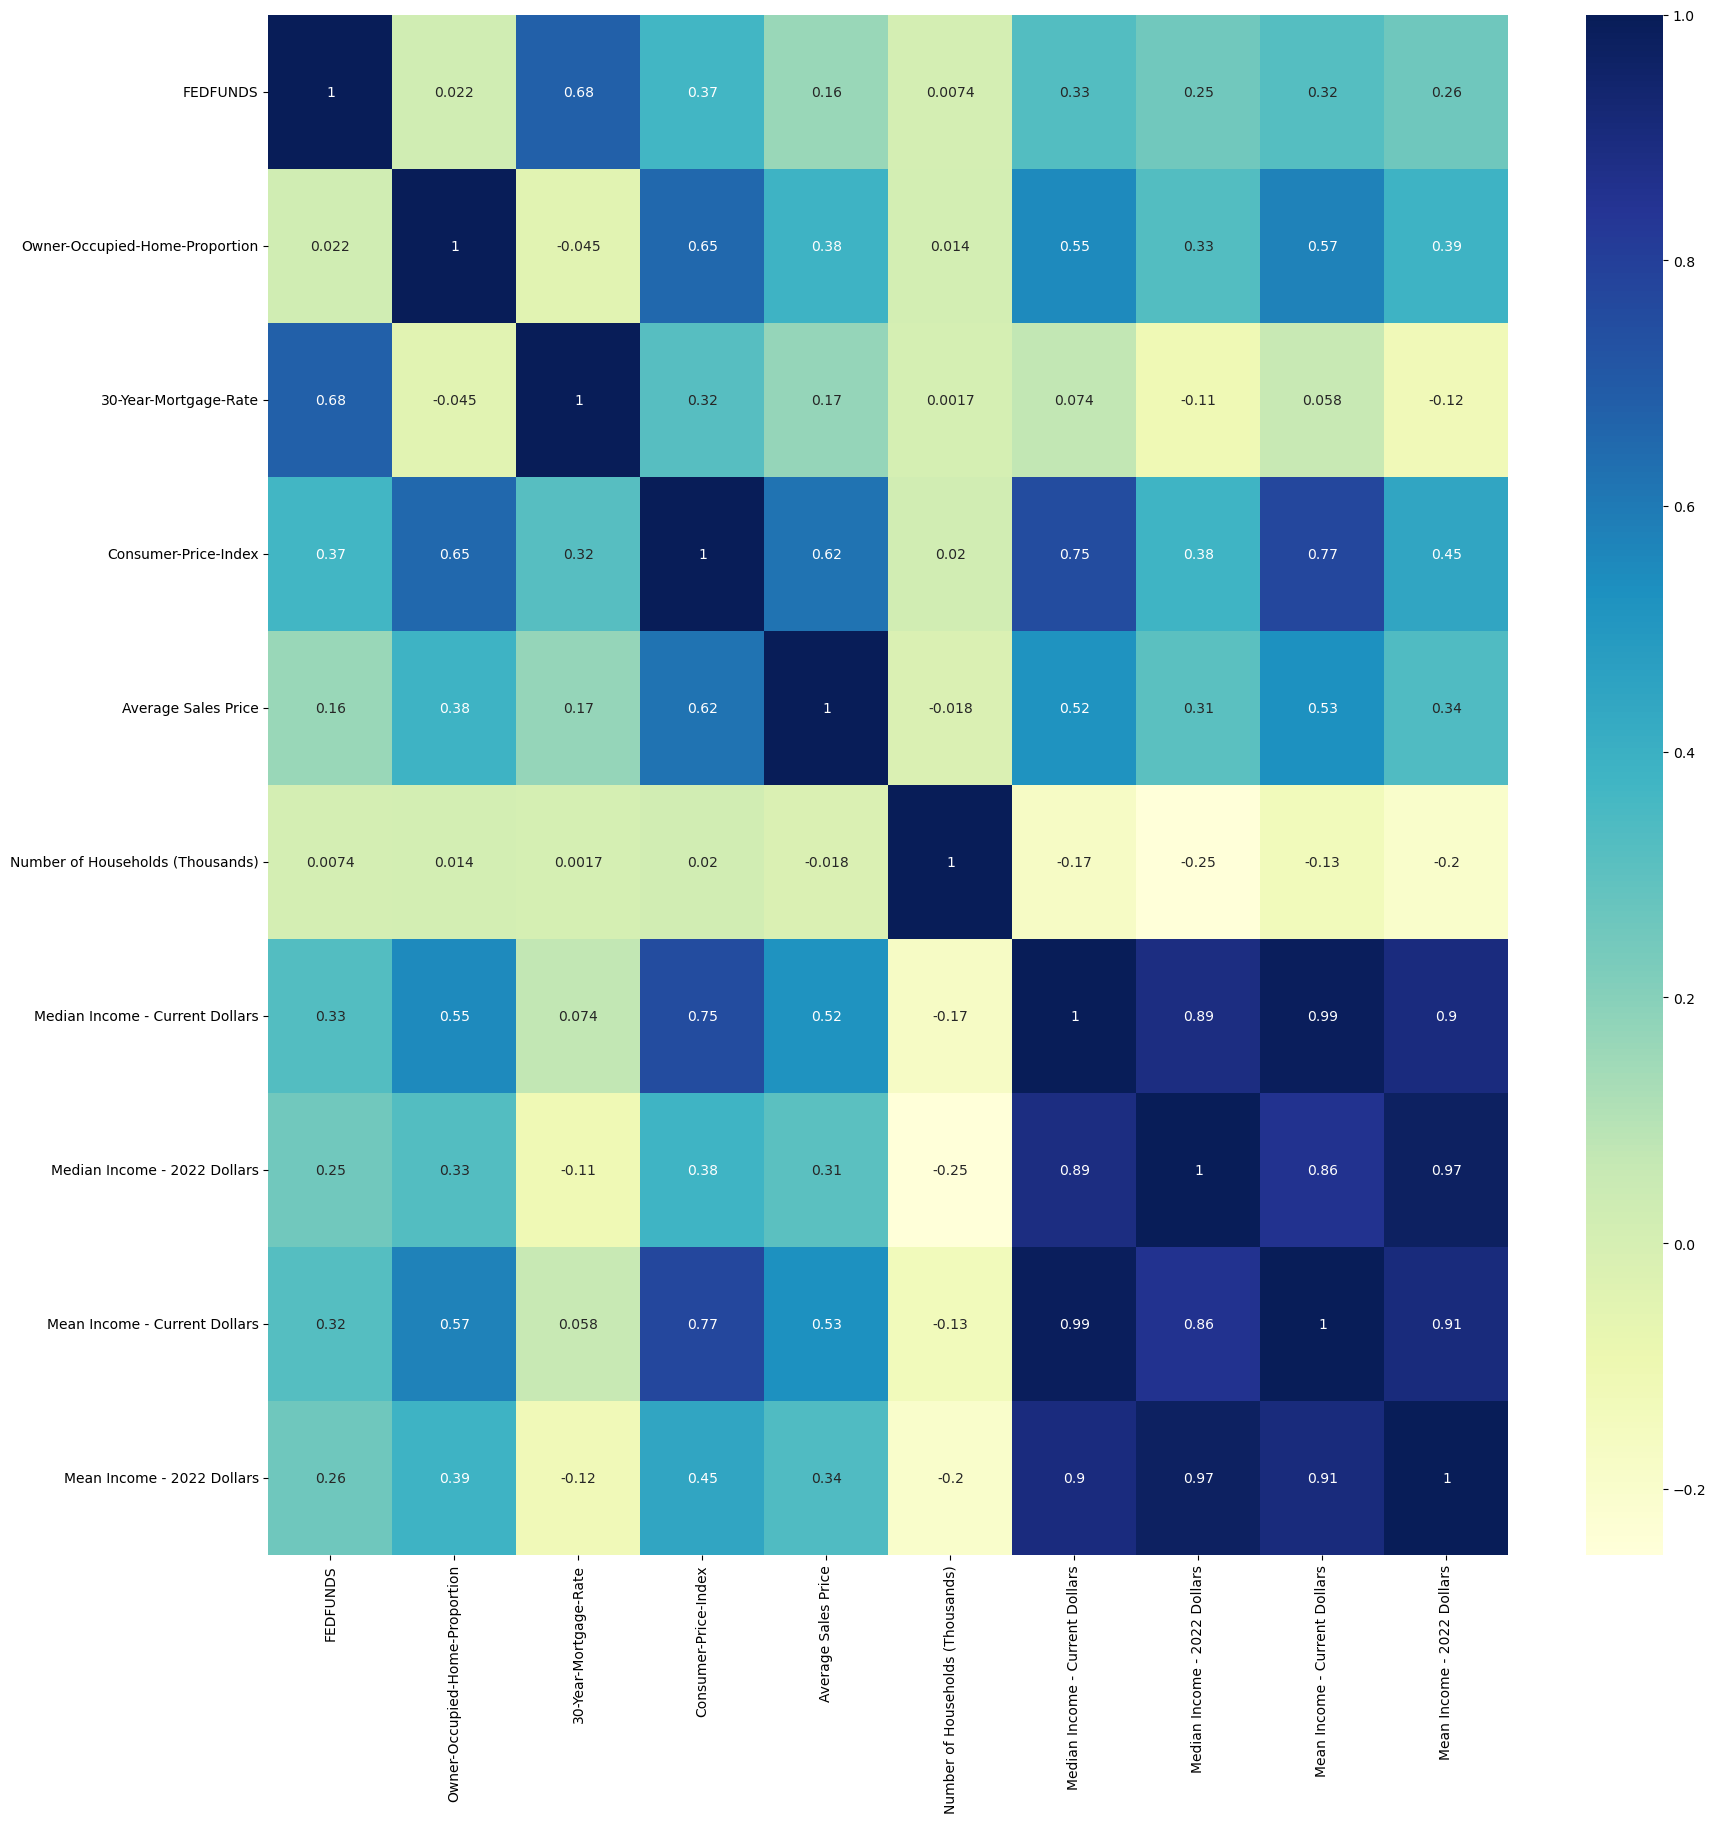

In [3]:
# First we need to remove the non-numeric variables
df = full_df[
    [
        i
        for i in full_df.columns
        if i
        not in ["Year", "Month", "Quarter", "Region", "Year-Quarter-Month", "Home Size"]
    ]
]

# Correlation variable
c = df.corr()

# Next we plot a heat map with teh correlations
plt.figure(figsize=(20, 20))
fig = sns.heatmap(c, cmap="YlGnBu", annot=True)
plt.show()

In [4]:
#First we need to get all the data pairs that are significant without duplicating them twice.
cor = []
for index, row in c.iterrows():
    for col in range(len(c.columns)):
        if (c.columns[col] != index) & ((c.columns[col],index,row[col]) not in cor) & (row[col] >= 0.5 or row[col] <= -0.5):
            cor.append((index,c.columns[col],row[col]))
            
meaningful_corr_df = pd.DataFrame(cor, columns=['Comparer', 'Comparee', 'Correlation'])
meaningful_corr_df

,Comparer,Comparee,Correlation
0,FEDFUNDS,30-Year-Mortgage-Rate,0.678521
1,Owner-Occupied-Home-Proportion,Consumer-Price-Index,0.654759
2,Owner-Occupied-Home-Proportion,Median Income - Current Dollars,0.550385
3,Owner-Occupied-Home-Proportion,Mean Income - Current Dollars,0.574947
4,Consumer-Price-Index,Average Sales Price,0.619562
5,Consumer-Price-Index,Median Income - Current Dollars,0.753959
6,Consumer-Price-Index,Mean Income - Current Dollars,0.774668
7,Average Sales Price,Median Income - Current Dollars,0.522185
8,Average Sales Price,Mean Income - Current Dollars,0.527454
9,Median Income - Current Dollars,Median Income - 2022 Dollars,0.889041


Based on the correlation matrix and heatmap, if we assume a threshold of significance where a correlation is >= 0.5 or =< -0.5, which will indicate a moderate to strong correlation, then we find that:
- FEDFUNDS & 30 Year Mortgage Rate                                 = 0.69
- Mean Income - Current Dollars & Owner-Occupied-Home-Proportion   = 0.57
- Mean Income - Current Dollars & Consumer-Price-Index             = 0.77
- Mean Income - Current Dollars & Average Sales Price              = 0.53
- Median Income - Current Dollars & Owner-Occupied-Home-Proportion = 0.55
- Median Income - Current Dollars & Consumer-Price-Index           = 0.75
- Median Income - Current Dollars & Average Sales Price            = 0.52
- Consumer Price Index & Owner-Occupied-Home-Proportion            = 0.65
- Consumer-Price-Index & Average Sales Price                       = 0.62
- (We excluded the bottom 6 from the above dataframe because 2022 dollars are very similar to current dollars and median, in this example, was very similar to the mean)

As we can see, the FEDFUNDS rate does correlate with the 30 Year Mortgage Rate, but it does not have a significant correlation with any other variable, including Owner-Occupied-Home-Proportion. This means the relationship between the two is not significant (i.e. a change in one does not mean there is likely a change in the other).

On the other hand, it looks like income directly correlates with Consumer-Price-Index, Average Sales Price, and Owner-Occupied-Home-Proportion, which would make logical sense. As income increases for the nation, then goods (Consumer-Price-Index), home sales, and the proportion of people owning a home should also increase, but we do not know which variable is the cause of which variable or if there is another variable not seen here that impacts them. In that same vein, we know that Consumer-Price-Index correlates with Average Sales Price and Owner-Occupied-Home-Proportion, which would also logically make sense. Again, that does not mean one causes the other.

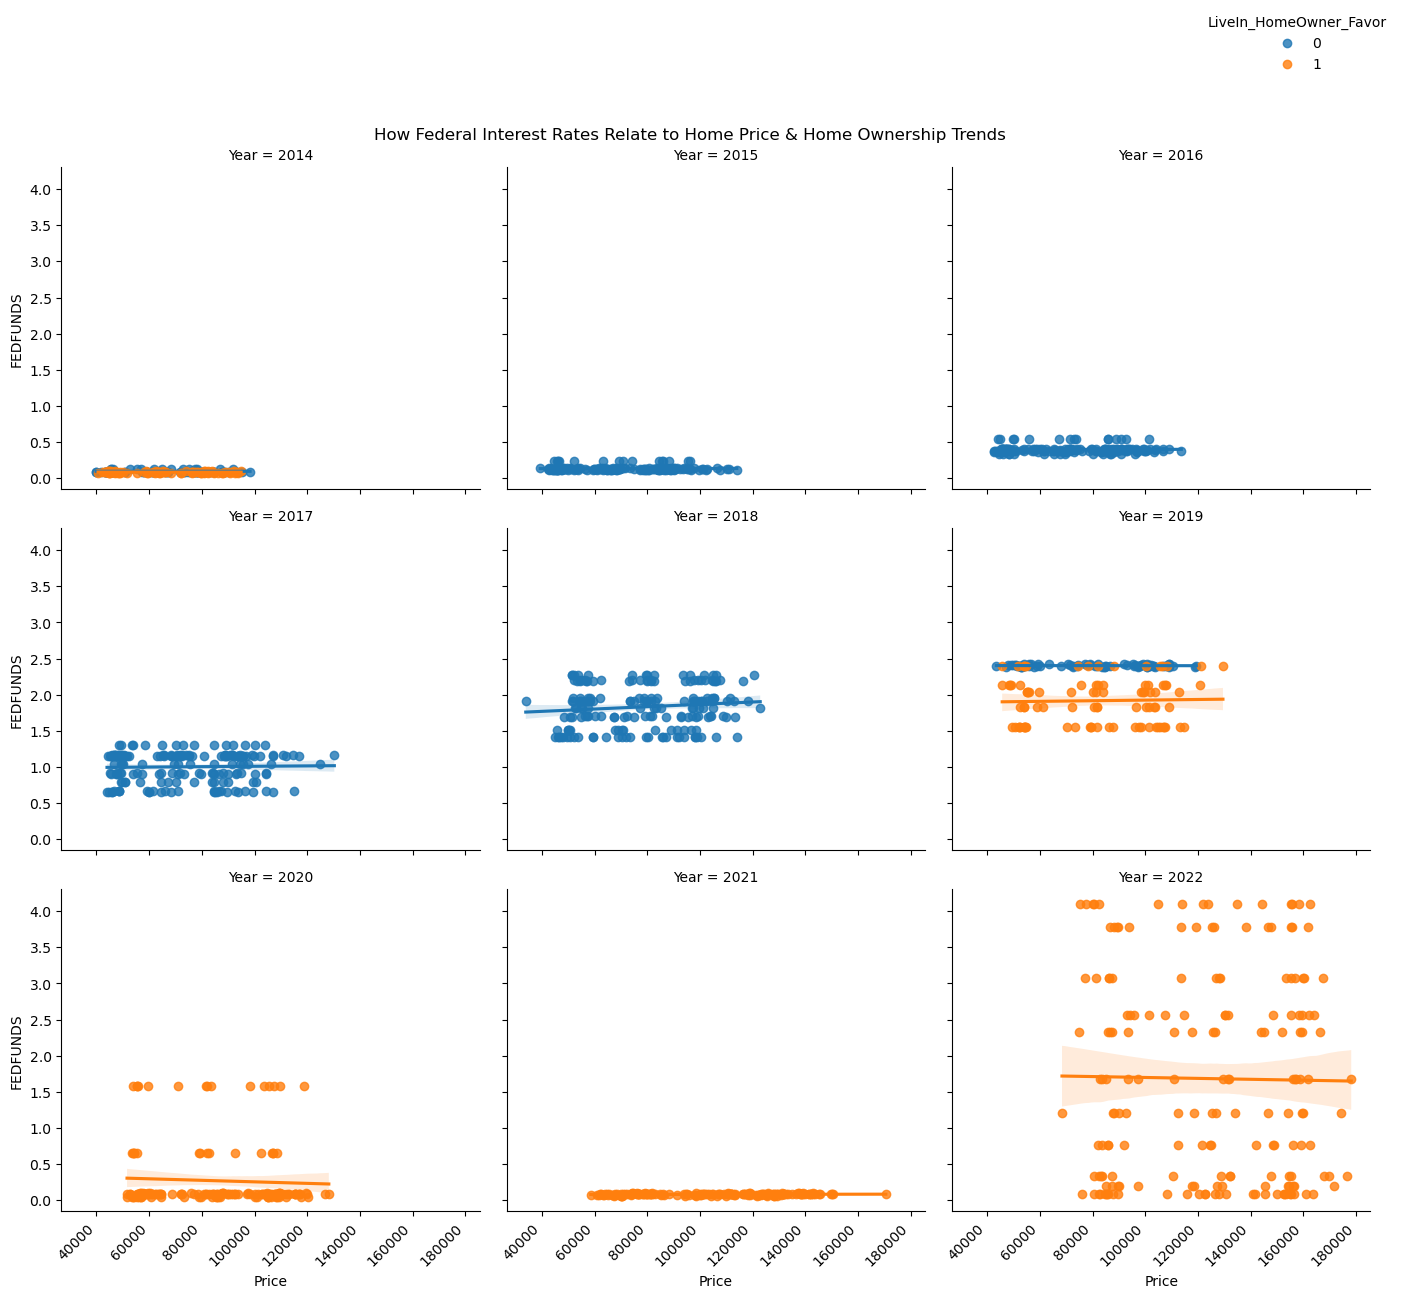

In [5]:
# Add a column that depicts whether or not the time period favored home ownership.
full_df["LiveIn_HomeOwner_Favor"] = (full_df["Owner-Occupied-Home-Proportion"]) - (
    full_df["Owner-Occupied-Home-Proportion"].mean()
)
full_df["LiveIn_HomeOwner_Favor"] = full_df["LiveIn_HomeOwner_Favor"].apply(
    lambda x: 0 if x < 0 else 1
)
full_df["Price"] = full_df["Average Sales Price"]

g = sns.lmplot(
    data=full_df,
    x="Price",
    y="FEDFUNDS",
    hue="LiveIn_HomeOwner_Favor",
    col="Year",
    col_wrap=3,
    height=4,
    legend=False
    # facet_kws={"legend_out": True}
)

# Rotate x-axis tick labels
for ax in g.axes.flat:
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

# Add an overall title
g.fig.suptitle(
    "How Federal Interest Rates Relate to Home Price & Home Ownership Trends"
)

# Adjust legend position and properties
g.add_legend(bbox_to_anchor=(1.01, 1.05))  # Move legend up slightly

plt.tight_layout()
plt.show()

Starting in 2014 we can observe a low interest rate environment with low average home cost. Live-In home ownership is favored, but at some point in 2014 this switches to favoring non-live-in homeowners. For the next four years we observe rising interest rates accompanied by an increase in average home price. During this period of rising rates, non-live-in home ownership is favored. By 2019, interest rates peak and begin to decrease. Leading up to this rate cut we may observe a shift to more live-in home-ownership which continues for the duration of the visual. It is important to note that while rates begin to decrease, price does not. The years 2020 and 2021 were the main years of the Pandemic which catalyzed aggressive quantitative easing. This explains the dramatic downward shift of interest rates. One of the consequences of quantitative easing is the dramatic increase/inflation of home price observed in 2021. In 2022 we can observe rising interest rates (quantitative tightening) to combat the aforementioned price inflation. It is important to note that while rates aggressively increase, inflated prices are maintained. This combination of financial burdens in a live-in home owner favored environment is conducive to underwater mortgages because as prices deflate in response to tightening the equity home owners have bought over time evaporates and raised interest rates limit options to refinance.

In [6]:
full_df_sp = full_df[full_df["Region"] == "United States"]

full_df_sp["LiveIn_HomeOwner_Favor"] = (
    full_df_sp["Owner-Occupied-Home-Proportion"]
) - (full_df_sp["Owner-Occupied-Home-Proportion"].mean())
full_df_sp["LiveIn_HomeOwner_Favor"] = full_df_sp["LiveIn_HomeOwner_Favor"].apply(
    lambda x: 0 if x < 0 else 1
)

ff_min = full_df_sp["FEDFUNDS"].min()
ff_max = full_df_sp["FEDFUNDS"].max()

sales_min = full_df_sp["Average Sales Price"].min()
sales_max = full_df_sp["Average Sales Price"].max()

chart = (
    alt.Chart(
        full_df_sp,
        title=alt.TitleParams(
            "Interest Rate Compared to Average Sales Price for the Whole United States",
            anchor="middle",
            baseline="line-top",
            lineHeight=1,
        ),
    )
    .mark_point(filled=True)
    .encode(
        x=alt.X("FEDFUNDS:Q", scale=alt.Scale(domain=(ff_min, ff_max))),
        y=alt.Y(
            "Average Sales Price:Q", scale=alt.Scale(domain=(sales_min, sales_max))
        ),
        color="LiveIn_HomeOwner_Favor:N",
    )
    .properties(width=600, height=400)
)

display(chart)

alt.Chart(...)

The above scatterplot shows the relationship between FEDFUNDS and Average Price with a color for home onwership behavior and without any sort of time component. It clearly shows no correlation between FEDFUNDS and Average Price. We can double check this by the query below.

In [7]:
print(
    "Correlation between FEDFUNDS and Average Sales Price: ",
    c.loc["FEDFUNDS", "Average Sales Price"],
)

Correlation between FEDFUNDS and Average Sales Price:  0.1579596566925741
